In [2]:
## the file to simulate light conversion by multiplanes
import numpy as np
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

## helper functions

In [2]:
def opt_fft2(X):
    """center shifted fourier transform """
    X_frq = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(X)))
    return X_frq

def opt_ifft2(X_frq):
    """center shifted inverse fourier transform """
    X = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(X_frq)))
    return X

def light_prop(e_in, z, dl=2, lmbd=0.5):
    """
    light propagation at distance z
    e_in: input field
    z: propagation distance
    dl: pixel size in um
    lmbd: wavelength in um
    """
    if e_in.ndim == 2:
        nx, ny = e_in.shape
    elif e_in.ndim == 3:
        nf, nx, ny = e_in.shape
    
    k=2*np.pi/lmbd # wavenumber
    dkx=2*np.pi/((nx-1)*dl)
    dky=2*np.pi/((ny-1)*dl)
    kx=(np.arange(nx)-nx/2)*dkx
    ky=(np.arange(ny)-ny/2)*dky
    kx_c, ky_c = np.meshgrid(kx,ky)
    
    prop_kernel=np.exp(1j*np.sqrt(k**2-kx_c**2-ky_c**2)*z)
    #prop_kernel=np.exp(1j*(k-(kx_c**2+ky_c**2)/2/k)*z)
    if e_in.ndim == 2:
        ek_in = opt_fft2(e_in)
        ek_out = ek_in*prop_kernel
        e_out = opt_ifft2(ek_out)
    elif e_in.ndim == 3:
        e_out = np.zeros_like(e_in, dtype=complex)
        for ii in range(nf):
            ek_in = opt_fft2(e_in[ii,:,:])
            ek_out = ek_in*prop_kernel
            e_out[ii,:,:] = opt_ifft2(ek_out)
        
    return e_out

def phase_mod(e_in, theta, samp_ratio):
    """
    e_in is the input field
    theta is the phase mask
    samp_ratio is the pixel size ratio between the phase mask and the e field 
    """
    if e_in.ndim == 2:
        e_out = e_in*np.kron(np.exp(1j*theta),np.ones((samp_ratio,samp_ratio)))
    elif e_in.ndim == 3:
        e_out = np.zeros_like(e_in, dtype=complex)
        nf, nx, ny = e_in.shape
        for ii in range(nf):
            e_out[ii,:,:] = e_in[ii,:,:]*np.kron(np.exp(1j*theta),np.ones((samp_ratio,samp_ratio)))
    
    return e_out

## Design of a 5-plane Optimization 

In [42]:
# wavelength
lmbd = 0.5 # in um
# coordinates
nx = 256
ny = 256
# pixel size
dl = 5 # unit um
x=(np.arange(nx)-nx/2)*dl
y=(np.arange(ny)-ny/2)*dl
x_c, y_c = np.meshgrid(x,y)

# input 
s_input_list = []
p = 90 # pitch
for  ii in range(5):
    ys = -ii*p*np.sqrt(2)/2
    for jj in range(ii):
        xs = ys + jj*p*np.sqrt(2)
        s_input_list.append([xs,ys])
        
s_input = np.asarray(s_input_list, dtype=np.float32)

nmod = s_input.shape[0]
e_in = np.zeros((nmod, ny, nx))
w_in = 30 # beam width
for ii in range(nmod):
    e = np.exp(-((x_c-s_input[ii,0])**2+(y_c-s_input[ii,1])**2)/w_in**2)
    I = np.sum(np.abs(e)**2)
    e_in[ii,:,:] = e/np.sqrt(I)

fig, ax = plt.subplots()
im=ax.imshow(np.sum(e_in, axis=0))
cbar=plt.colorbar(im)  

# output
e_out = np.zeros((nmod, ny, nx))
w_out = 200
for  ii in range(5):
    for jj in range(ii):
        c = np.zeros((jj+1,ii-jj))
        c[jj,ii-jj-1]=1
        e = np.polynomial.hermite.hermgrid2d(np.sqrt(2)*x/w_out, np.sqrt(2)*y/w_out, c)*np.exp(-(x_c**2+y_c**2)/w_out**2)
        I = np.sum(np.abs(e)**2)
        kk = ii*(ii-1)//2+jj # list index
        e_out[kk,:,:] = e/np.sqrt(I)

fig, ax = plt.subplots()
im=ax.imshow(e_out[1,:,:])
cbar=plt.colorbar(im) 

NameError: name 'plt' is not defined

0 forward iteration, couple efficiency 0.645036 

0 backward iteration, couple efficiency 0.542109 

1 forward iteration, couple efficiency 0.705825 

1 backward iteration, couple efficiency 0.599862 

2 forward iteration, couple efficiency 0.721700 

2 backward iteration, couple efficiency 0.628055 

3 forward iteration, couple efficiency 0.736255 

3 backward iteration, couple efficiency 0.647677 

4 forward iteration, couple efficiency 0.747354 

4 backward iteration, couple efficiency 0.662478 

5 forward iteration, couple efficiency 0.755704 

5 backward iteration, couple efficiency 0.674487 

6 forward iteration, couple efficiency 0.761783 

6 backward iteration, couple efficiency 0.682672 

7 forward iteration, couple efficiency 0.765718 

7 backward iteration, couple efficiency 0.688747 

8 forward iteration, couple efficiency 0.769441 

8 backward iteration, couple efficiency 0.694090 

9 forward iteration, couple efficiency 0.772545 

9 backward iteration, couple efficiency 0

80 forward iteration, couple efficiency 0.849102 

80 backward iteration, couple efficiency 0.805092 

81 forward iteration, couple efficiency 0.850233 

81 backward iteration, couple efficiency 0.806479 

82 forward iteration, couple efficiency 0.851539 

82 backward iteration, couple efficiency 0.808334 

83 forward iteration, couple efficiency 0.852986 

83 backward iteration, couple efficiency 0.810348 

84 forward iteration, couple efficiency 0.854543 

84 backward iteration, couple efficiency 0.812069 

85 forward iteration, couple efficiency 0.856080 

85 backward iteration, couple efficiency 0.813611 

86 forward iteration, couple efficiency 0.857532 

86 backward iteration, couple efficiency 0.814973 

87 forward iteration, couple efficiency 0.858801 

87 backward iteration, couple efficiency 0.816204 

88 forward iteration, couple efficiency 0.859845 

88 backward iteration, couple efficiency 0.817317 

89 forward iteration, couple efficiency 0.860770 

89 backward iteration,

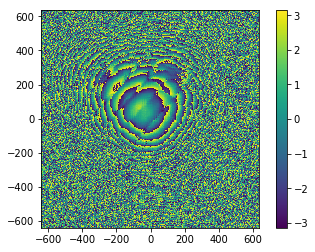

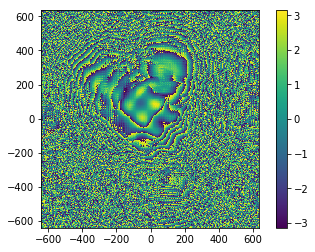

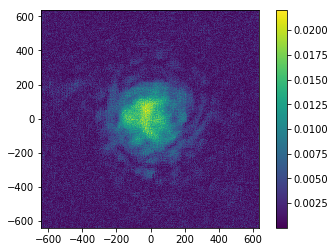

In [7]:
## 5 plates in between
npl = 5 # number of plates
d = [2e4,2.5e4,2.5e4,2.5e4,2.5e4,2e4]
theta = np.zeros((npl,nx,ny))
e_fwd = np.zeros((npl+2,nmod,nx,ny), dtype=complex) 
e_bwd = np.zeros((npl+2,nmod,nx,ny), dtype=complex) 
e_fwd[0,:,:,:] = e_in
e_bwd[-1,:,:,:] = e_out

# initial backpropagte
e_bwd_m = e_out # modulated field
for jj in range(npl):
    e_bwd[-jj-2,:,:,:] = light_prop(e_bwd_m, -d[-jj-1], dl, lmbd)#backpropagates        
    e_bwd_m = phase_mod(e_bwd[-jj-2,:,:,:], -theta[-jj-1,:,:], samp_ratio=1)

nitr = 100 # number of iteration
for ii in range(nitr):
    # forward update   
    e_fwd_m = e_in # initial modulated field
    for jj in range(npl):
        e_fwd[jj+1,:,:,:] = light_prop(e_fwd_m, d[jj], dl, lmbd)
        e_sum = np.sum(e_fwd[jj+1,:,:,:]*np.conj(e_bwd[jj+1,:,:,:]),axis=0)
        theta[jj,:,:] = -np.angle(e_sum) # updates
        e_fwd_m = phase_mod(e_fwd[jj+1,:,:,:], theta[jj,:,:], samp_ratio=1)
    
    e_fwd[npl+1,:,:,:] = light_prop(e_fwd_m, d[npl], dl, lmbd)
    couple_eff = np.sum(np.abs(e_fwd[npl+1,:,:,:]*np.conj(e_out)))/nmod
    print("%d forward iteration, couple efficiency %f \n" % (ii, couple_eff))
    
    # backward update
    e_bwd_m = e_out # initial modulated field
    for jj in range(npl):
        e_bwd[-jj-2,:,:,:] = light_prop(e_bwd_m, -d[jj-1], dl, lmbd)
        e_sum = np.sum(e_fwd[-jj-2,:,:,:]*np.conj(e_bwd[-jj-2,:,:,:]), axis=0)
        theta[-jj-1,:,:] = -np.angle(e_sum) # updates
        e_bwd_m = phase_mod(e_bwd[-jj-2,:,:,:], -theta[-jj-1,:,:], samp_ratio=1)
    
    e_bwd[0,:,:,:] = light_prop(e_bwd_m, -d[0], dl, lmbd)
    couple_eff = np.sum(np.abs(e_in*np.conj(e_bwd[0,:,:,:])))/nmod
    print("%d backward iteration, couple efficiency %f \n" % (ii, couple_eff))


fig, ax = plt.subplots()
im=ax.imshow(theta[0,:,:],extent=(x[0],x[-1],y[0],y[-1]))
cbar=plt.colorbar(im)

fig, ax = plt.subplots()
im=ax.imshow(theta[1,:,:],extent=(x[0],x[-1],y[0],y[-1]))
cbar=plt.colorbar(im)

# verify
e = np.zeros((npl+2,nmod,nx,ny), dtype=complex) 
e[0,:,:,:] = e_in
e_m = e_in # modulated field
for jj in range(npl):
    e[jj+1,:,:,:] = light_prop(e_m, d[jj], dl, lmbd)#backpropagates        
    e_m = phase_mod(e[jj+1,:,:,:], theta[jj,:,:], samp_ratio=1)
e_o = light_prop(e_m, d[jj+1], dl, lmbd)
fig, ax = plt.subplots()
im = ax.imshow(np.abs(e_o[0,:,:]),extent=(x[0],x[-1],y[0],y[-1]))
cbar = plt.colorbar(im)

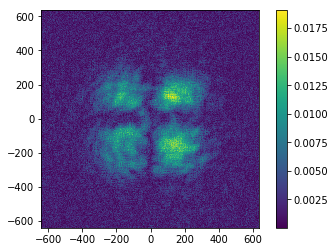

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(np.abs(e_o[4,:,:]),extent=(x[0],x[-1],y[0],y[-1]))
cbar = plt.colorbar(im)